In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics

%matplotlib inline

In [2]:
# read excel file into data varible
data = pd.ExcelFile('bloomberg/bloomberg data new.xlsx')
print('This code imports an Excel file named ''bloomberg data new.xlsx','using the pandas library''s ExcelFile method.')

This code imports an Excel file named bloomberg data new.xlsx using the pandas librarys ExcelFile method.


In [3]:
#fetched sheets present in excel file
dfs = {sheet_name: data.parse(sheet_name) 
          for sheet_name in data.sheet_names}
comment = '''
This code creates a dictionary of pandas DataFrames called dfs using a dictionary comprehension. For each sheet name in the data object (which represents an Excel file that has been imported using pandas), the parse method is called on the data object, and the resulting DataFrame is stored in the dfs dictionary under the sheet name as the key.'''
print(comment)


This code creates a dictionary of pandas DataFrames called dfs using a dictionary comprehension. For each sheet name in the data object (which represents an Excel file that has been imported using pandas), the parse method is called on the data object, and the resulting DataFrame is stored in the dfs dictionary under the sheet name as the key.


In [4]:
#stored sheet1's data in raw variable
raw = dfs['Sheet1']

In [5]:
raw
print('Raw data containing NAN values')

Raw data containing NAN values


In [6]:
#Removed Null values from entire dataset
raw = raw[raw['SMAVG (15)'].notna()]
df = pd.DataFrame(raw)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year and month as separate features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

raw = df.set_index('Date', inplace=True)
comment = '''This code performs several data preprocessing steps on a pandas DataFrame called raw.

The first line removes all the rows that have missing values in the 'SMAVG (15)' column using the notna() method, which returns a boolean mask that indicates which values are not null. The resulting DataFrame is stored in a new variable called df.

The next three lines convert the 'Date' column to a datetime data type using the to_datetime() method. Then, the year, month, and day components of the 'Date' column are extracted using the dt accessor and added as separate columns in the df DataFrame.

Finally, the set_index() method is called on the df DataFrame to set the 'Date' column as the new index of the DataFrame. The inplace parameter is set to True, which means that the raw DataFrame is modified in place rather than creating a new DataFrame.'''

print(comment)

This code performs several data preprocessing steps on a pandas DataFrame called raw.

The first line removes all the rows that have missing values in the 'SMAVG (15)' column using the notna() method, which returns a boolean mask that indicates which values are not null. The resulting DataFrame is stored in a new variable called df.

The next three lines convert the 'Date' column to a datetime data type using the to_datetime() method. Then, the year, month, and day components of the 'Date' column are extracted using the dt accessor and added as separate columns in the df DataFrame.

Finally, the set_index() method is called on the df DataFrame to set the 'Date' column as the new index of the DataFrame. The inplace parameter is set to True, which means that the raw DataFrame is modified in place rather than creating a new DataFrame.


In [7]:
df
print('Dataset without missing or NAN values')

Dataset without missing or NAN values


In [8]:
# Prepare the features and target variable
X = df[['Year', 'Month','Day','Volume','SMAVG (15)']]
y = df['Last Price']
comment='''This code prepares the features and target variable for a regression analysis.

The X variable contains a DataFrame with the features that will be used to predict the target variable. In this case, the features are the year, month, day, volume, and simple moving average of the last 15 days.

The y variable contains a Series with the target variable that will be predicted. In this case, the target variable is the 'Last Price' column of the df DataFrame.

Together, X and y represent the input and output data for the regression analysis. The goal of the analysis will be to learn a function that can predict the 'Last Price' column from the given features in X.'''

print(comment)

This code prepares the features and target variable for a regression analysis.

The X variable contains a DataFrame with the features that will be used to predict the target variable. In this case, the features are the year, month, day, volume, and simple moving average of the last 15 days.

The y variable contains a Series with the target variable that will be predicted. In this case, the target variable is the 'Last Price' column of the df DataFrame.

Together, X and y represent the input and output data for the regression analysis. The goal of the analysis will be to learn a function that can predict the 'Last Price' column from the given features in X.


<AxesSubplot:xlabel='Date'>

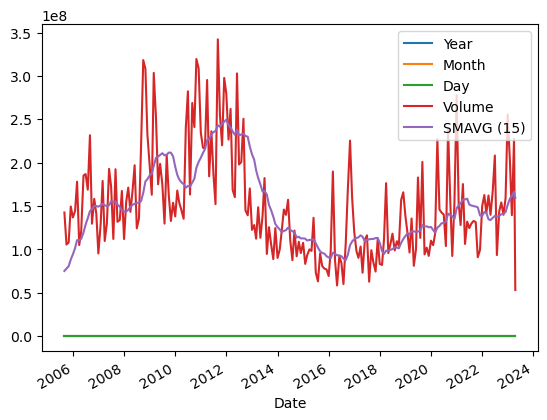

In [9]:
X.plot()

In [10]:
X

,Year,Month,Day,Volume,SMAVG (15)
Date,,,,,
2023-04-18,2023,4,18,53050340,159090016.0
2023-03-31,2023,3,31,227460000,166387328.0
2023-02-28,2023,2,28,139360000,161210672.0
2023-01-31,2023,1,31,201960000,158540000.0
2022-12-30,2022,12,30,255580000,151134000.0
...,...,...,...,...,...
2005-12-30,2005,12,30,136730000,94216000.0
2005-11-30,2005,11,30,149370000,88129336.0
2005-10-31,2005,10,31,107870000,80596000.0


<AxesSubplot:xlabel='Date'>

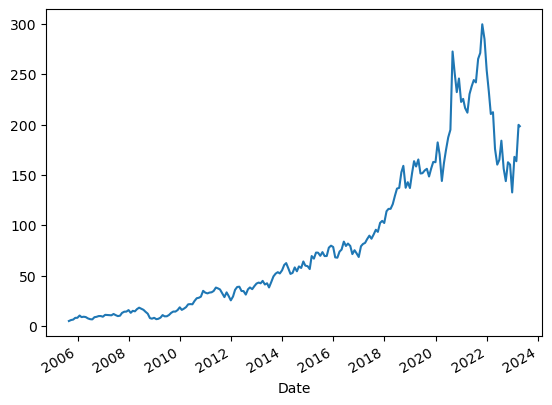

In [11]:
y.plot()

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
comment ='''
This code performs feature scaling using the StandardScaler() method from scikit-learn, and then splits the data into training and testing sets using the train_test_split() method.

The StandardScaler() method scales the data by subtracting the mean of each feature and dividing by its standard deviation. This is done to ensure that all features are on the same scale and have equal weight during the regression analysis.

The scaled feature matrix is then stored in X_scaled.

The train_test_split() method splits the data into random training and testing sets, with a specified test size of 0.2 (i.e., 20% of the data is reserved for testing). The random_state parameter is set to 42 to ensure reproducibility of the split. The resulting training and testing sets are stored in X_train, X_test, y_train, and y_test.'''

print(comment)


This code performs feature scaling using the StandardScaler() method from scikit-learn, and then splits the data into training and testing sets using the train_test_split() method.

The StandardScaler() method scales the data by subtracting the mean of each feature and dividing by its standard deviation. This is done to ensure that all features are on the same scale and have equal weight during the regression analysis.

The scaled feature matrix is then stored in X_scaled.

The train_test_split() method splits the data into random training and testing sets, with a specified test size of 0.2 (i.e., 20% of the data is reserved for testing). The random_state parameter is set to 42 to ensure reproducibility of the split. The resulting training and testing sets are stored in X_train, X_test, y_train, and y_test.


In [13]:
#Loading Model
model = LinearRegression()

In [14]:
#Fitting the training datasets
model.fit(X_train, y_train)

LinearRegression()

In [15]:
#predicting future prices of stock
y_pred = model.predict(X_test)


In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
comment ='''
These lines of code compute two evaluation metrics for the regression model: mean squared error (MSE) and R-squared (R2) score.

The mean_squared_error() function from scikit-learn is used to compute the mean squared error between the actual target values (y_test) and the predicted target values (y_pred). The MSE is a measure of how close the predicted values are to the actual values. Lower values of MSE indicate better performance.

The r2_score() function from scikit-learn is used to compute the R-squared score between the actual target values (y_test) and the predicted target values (y_pred). The R2 score is a measure of how well the regression model fits the data. It ranges from 0 to 1, with higher values indicating better performance. An R2 score of 1 indicates a perfect fit.
'''
print(comment)


These lines of code compute two evaluation metrics for the regression model: mean squared error (MSE) and R-squared (R2) score.

The mean_squared_error() function from scikit-learn is used to compute the mean squared error between the actual target values (y_test) and the predicted target values (y_pred). The MSE is a measure of how close the predicted values are to the actual values. Lower values of MSE indicate better performance.

The r2_score() function from scikit-learn is used to compute the R-squared score between the actual target values (y_test) and the predicted target values (y_pred). The R2 score is a measure of how well the regression model fits the data. It ranges from 0 to 1, with higher values indicating better performance. An R2 score of 1 indicates a perfect fit.



In [17]:
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)
print('----------------------------**********-----------------------------')

comment = '''The computed MSE value of 1163.7352458805083 indicates that, on average, the predicted target values are off by the square root of this number, which is approximately 34.1. This means that the model has some degree of error in its predictions, but the error is not too large.

The computed R2 score value of 0.8044981712384076 indicates that the regression model fits the data reasonably well, explaining about 80.4% of the total variance in the target variable. This is a good indication of model performance, as R2 scores range from 0 to 1, with higher values indicating better fit.

Overall, the MSE and R2 score values suggest that the regression model has some degree of error, but performs reasonably well in fitting the data and making predictions.'''

print(comment)

Mean Squared Error (MSE): 1163.7352458805085
R-squared (R2) Score: 0.8044981712384076
----------------------------**********-----------------------------
The computed MSE value of 1163.7352458805083 indicates that, on average, the predicted target values are off by the square root of this number, which is approximately 34.1. This means that the model has some degree of error in its predictions, but the error is not too large.

The computed R2 score value of 0.8044981712384076 indicates that the regression model fits the data reasonably well, explaining about 80.4% of the total variance in the target variable. This is a good indication of model performance, as R2 scores range from 0 to 1, with higher values indicating better fit.

Overall, the MSE and R2 score values suggest that the regression model has some degree of error, but performs reasonably well in fitting the data and making predictions.


In [18]:
lr = pd.DataFrame( y_test.values, columns=['actual'],index=y_test.index)

In [19]:
lr['pred'] = y_pred

<AxesSubplot:xlabel='Date'>

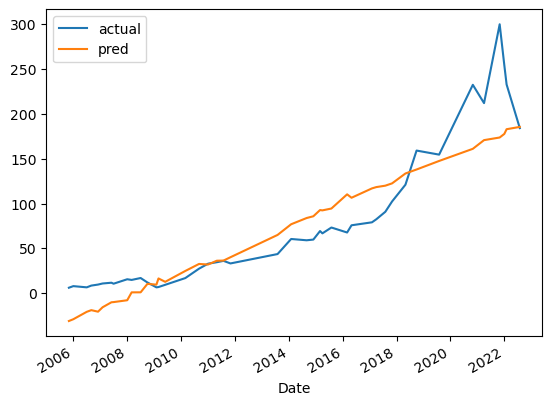

In [20]:
lr.plot()

In [21]:

# Perform Min-Max scaling on the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=422)

# Create a linear regression model
mod = LinearRegression()

# Define the hyperparameter grid for grid search
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1, 2, 4, 8]
}

comment ='''Finally, a hyperparameter grid is defined for grid search using param_grid. The hyperparameters included in the grid are fit_intercept, copy_X, and n_jobs. The fit_intercept hyperparameter is a Boolean that determines whether to fit the intercept term in the linear regression model. The copy_X hyperparameter is also a Boolean that determines whether to copy the input data or not. The n_jobs hyperparameter specifies the number of CPU cores to use during the computation, with -1 indicating using all available cores.'''

print(comment)

Finally, a hyperparameter grid is defined for grid search using param_grid. The hyperparameters included in the grid are fit_intercept, copy_X, and n_jobs. The fit_intercept hyperparameter is a Boolean that determines whether to fit the intercept term in the linear regression model. The copy_X hyperparameter is also a Boolean that determines whether to copy the input data or not. The n_jobs hyperparameter specifies the number of CPU cores to use during the computation, with -1 indicating using all available cores.


In [22]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(mod, param_grid, cv=5)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [-1, 1, 2, 4, 8]})

In [23]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters on the entire training data
best_model = LinearRegression(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Best Hyperparameters:', best_params)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)
print('Comment')
print('The performance of the model was then evaluated using the mean squared error (MSE) and R-squared (R2) score. The MSE value of 829.205 and R2 score of 0.829 indicate that the model has a reasonably good fit to the data, with the predicted values being close to the actual values.')

Best Hyperparameters: {'copy_X': True, 'fit_intercept': False, 'n_jobs': -1}
Mean Squared Error (MSE): 829.2053727344322
R-squared (R2) Score: 0.8294565599497838
Comment
The performance of the model was then evaluated using the mean squared error (MSE) and R-squared (R2) score. The MSE value of 829.205 and R2 score of 0.829 indicate that the model has a reasonably good fit to the data, with the predicted values being close to the actual values.


In [24]:
grid = pd.DataFrame(y_test.values, columns=['Actual'],index = y_test.index)
grid['pred'] = y_pred

PLotting Prediction vs Actual on Test Data


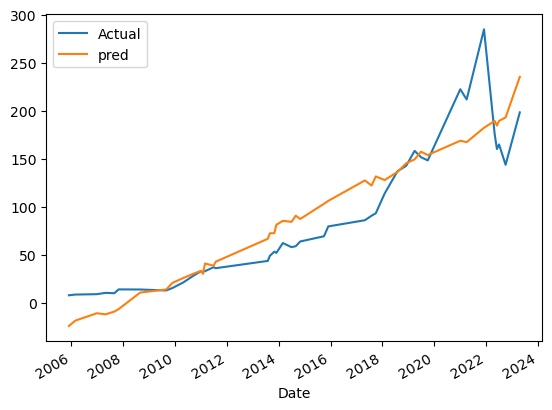

In [25]:
grid.plot()
print('PLotting Prediction vs Actual on Test Data')